In [34]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import dabest
import osar

#NOTE: SUPPRESSES WARNINGS!

import warnings

warnings.simplefilter(action="ignore", category=RuntimeWarning)
#warnings.simplefilter(action="default", category=RuntimeWarning)

In [49]:
basegenotype = "VT999036"
responder = "ACR"
addNotes = basegenotype + " x " + responder
#VT999036: Epoch 1
#
##CHECK DRIVE LETTER
filedirectory = "D:\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\OSAR\\"

baseDirectory = filedirectory + addNotes

#### sets up filename for later - make sure this is correct

if len(addNotes) > 0:
    addNotes = "_" + addNotes   
#filename = baseDirectory + "/" + str(baseDirectory).split("/", -1)[-1][7:] 
filename = baseDirectory + "\\" + basegenotype
filename_AppendDT = "_gen " + dt.datetime.today().strftime('%Y-%m-%d')

##### use this if you need to set filename manually
#filename = baseDirectory + "/" + "201230 R58E02-LexA;VT999036-Gal4 x Dop2R-RNAi;LexAOP-Chrimson_Female"

filename = filename + addNotes + filename_AppendDT

filename

'C:\\Users\\User\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\OSAR\\SS67741 x Chrimson2\\SS67741_SS67741 x Chrimson2_gen 2024-04-30'

In [50]:
if responder == "Chrimson2":
    light_color = "deeppink"
    colors = "Reds"
    
if responder == "ACR":
    light_color = "dodgerblue"
    colors = "Greens"

In [51]:
#check for border shift
osarAnalysis = osar.osar(baseDirectory,
                        # border_shift_mm = 1.5,  
                        # countlog_folder = "countlog_Full Only",         
                        # countlog_folder = "countlog_Half and Full",
                         driver = basegenotype)

Creating borders for each fly...
Done.

Processing CSV 40 of 40
Summarising results for all flies...
All done.


In [53]:
my_color_palette3 = {"Eighth; Sibling" : "lightgray",
                      "Eighth; Offspring"    : light_color,
                    "Quarter; Sibling" : "lightgray",
                      "Quarter; Offspring"    : light_color, 
                     "Half; Sibling" : "lightgray",
                      "Half; Offspring"    : light_color,
                     "Full; Sibling" : "lightgray",
                      "Full; Offspring"    : light_color
                     }


c:\Users\User\anaconda3\lib\site-packages\osar\plot_helpers\plot_helpers.py:204: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  plot_df[c].cat.remove_unused_categories(inplace=True)
c:\Users\User\anaconda3\lib\site-packages\dabest\_classes.py:290: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  plot_data[self.__xvar].cat.remove_unused_categories(inplace=True)
c:\Users\User\anaconda3\lib\site-packages\dabest\_classes.py:291: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  plot_data[self.__xvar].cat.reorder_categories(all_plot_groups,
c:\Users\User\anaconda3\lib\site-packages\dabest\plotter.py:473: FutureWarning: Passing `palette` without assignin

DABEST v2023.02.14
                  
Good afternoon!
The current time is Tue Apr 30 16:06:09 2024.

The unpaired mean difference between Eighth; Sibling and Eighth; Offspring is -0.00841 [95%CI -0.0349, 0.0233].
The p-value of the two-sided permutation t-test is 0.594, calculated for legacy purposes only. 

The unpaired mean difference between Quarter; Sibling and Quarter; Offspring is -0.00258 [95%CI -0.0463, 0.0331].
The p-value of the two-sided permutation t-test is 0.9, calculated for legacy purposes only. 

The unpaired mean difference between Half; Sibling and Half; Offspring is -0.00859 [95%CI -0.0416, 0.0607].
The p-value of the two-sided permutation t-test is 0.706, calculated for legacy purposes only. 

The unpaired mean difference between Full; Sibling and Full; Offspring is -0.0283 [95%CI -0.0806, 0.0251].
The p-value of the two-sided permutation t-test is 0.225, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corre

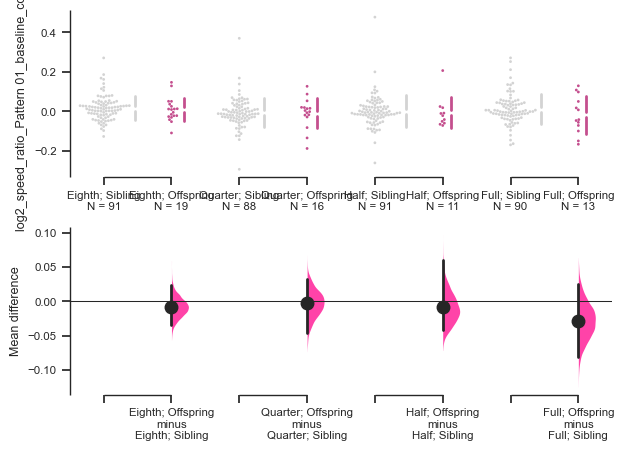

In [54]:
speedratio2 = osarAnalysis.contrasts.log2_speed_ratio.light_speed_against_dark_speed(epoch='first')

speedratio2.mean_diff.plot(raw_marker_size=2, custom_palette = my_color_palette3, legend_kwargs=None, fig_size=(7,5)
                          )

#, swarm_ylim = (-20, 10), contrast_ylim = (-1, 1)

sns.set(font_scale=0.7, style='ticks')
speedratio2.mean_diff

In [55]:
osarAnalysis_PI = osarAnalysis.contrasts.pi.time_spent_in_light(baseline_corrected="False", epoch='first')
osarAnalysis_PI


c:\Users\User\anaconda3\lib\site-packages\osar\plot_helpers\plot_helpers.py:204: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  plot_df[c].cat.remove_unused_categories(inplace=True)
c:\Users\User\anaconda3\lib\site-packages\dabest\_classes.py:290: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  plot_data[self.__xvar].cat.remove_unused_categories(inplace=True)
c:\Users\User\anaconda3\lib\site-packages\dabest\_classes.py:291: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  plot_data[self.__xvar].cat.reorder_categories(all_plot_groups,


DABEST v2023.02.14
                  
Good afternoon!
The current time is Tue Apr 30 16:06:09 2024.

Effect size(s) with 95% confidence intervals will be computed for:
1. Eighth; Offspring minus Eighth; Sibling
2. Quarter; Offspring minus Quarter; Sibling
3. Half; Offspring minus Half; Sibling
4. Full; Offspring minus Full; Sibling

5000 resamples will be used to generate the effect size bootstraps.

c:\Users\User\anaconda3\lib\site-packages\dabest\plotter.py:563: UserWarning: FixedFormatter should only be used together with FixedLocator
  rawdata_axes.set_xticklabels(ticks_with_counts)


DABEST v2023.02.14
                  
Good afternoon!
The current time is Tue Apr 30 16:06:11 2024.

The unpaired mean difference between Eighth; Sibling and Eighth; Offspring is 0.246 [95%CI -0.0172, 0.485].
The p-value of the two-sided permutation t-test is 0.0414, calculated for legacy purposes only. 

The unpaired mean difference between Quarter; Sibling and Quarter; Offspring is 0.169 [95%CI -0.116, 0.42].
The p-value of the two-sided permutation t-test is 0.188, calculated for legacy purposes only. 

The unpaired mean difference between Half; Sibling and Half; Offspring is 0.091 [95%CI -0.245, 0.373].
The p-value of the two-sided permutation t-test is 0.476, calculated for legacy purposes only. 

The unpaired mean difference between Full; Sibling and Full; Offspring is 0.341 [95%CI 0.00278, 0.603].
The p-value of the two-sided permutation t-test is 0.0106, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accel

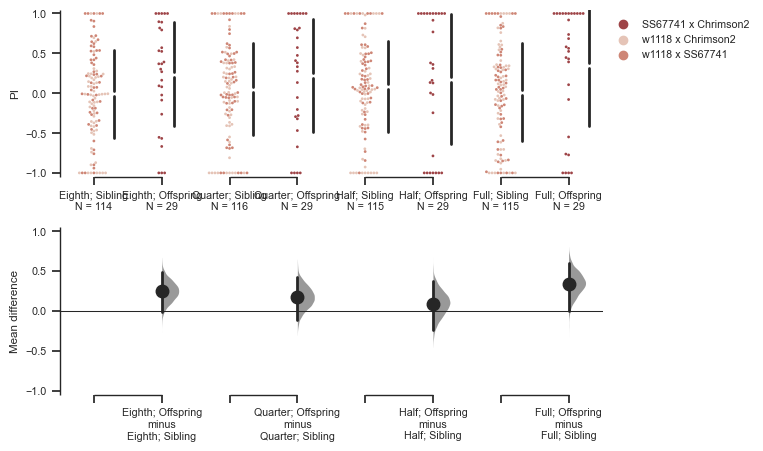

In [56]:
osarFig_PI_Meandiff = osarAnalysis_PI.mean_diff.plot(color_col='genotype', 
                               swarm_ylim=(-1.05,1.05),
                               contrast_ylim=(-1.05,1.05),
                             custom_palette= colors,
                               fig_size=(7,5),
                               #fig_size=(10,7),
                               swarm_label="PI",
                               raw_marker_size= 2 )
sns.set(font_scale=0.75)
osarAnalysis_PI.mean_diff

In [57]:
osarFig_PI_Meandiff.savefig(filename + '.png', bbox_inches="tight", dpi=300)